In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [64]:
# Load the dataset
df = pd.read_csv('AG_NO3_fill_cells_remove_NAN.csv')


In [72]:
# Set the Window Size and Initial Threshold
window_size = 100
step_size = 1
q_percentile = 97 

# initial the anomaly labels
anomaly_labels = np.zeros(len(df))


for start_index in range(len(df) - window_size + 1):
    window = df.iloc[start_index:start_index + window_size]
    threshold = np.percentile(window['NO3N'], q_percentile, method='linear')
    
    # Label the new data point
    if start_index != 0:  # Skip for the first window
        if df.iloc[start_index + window_size - 1]['NO3N'] > threshold:
            anomaly_labels[start_index + window_size - 1] = 1  # Anomaly



In [73]:
# Convert 'Student_Flag' to a numpy array for easier comparison 
manual_flags = df['Student_Flag'].values


# Calculate correct anomaly detection cases
correct_anomaly_detection = np.sum((anomaly_labels == 1) & (manual_flags == 1))


# Calculate total anomaly cases
total_anomaly_cases = np.sum(manual_flags == 1)


# Calculate correct normal detection cases
correct_normal_detection = np.sum((anomaly_labels == 0) & (manual_flags == 0))


# Calculate total normal cases
total_normal_cases = np.sum(manual_flags == 0)


# Calculate accuracy rates
normal_event_detection_accuracy_rate = correct_normal_detection / total_normal_cases
anomaly_event_detection_accuracy_rate = correct_anomaly_detection / total_anomaly_cases


print("normal event detection accuracy rate is :" + str(normal_event_detection_accuracy_rate))
print("anomaly event detection accuracy rate :" + str(anomaly_event_detection_accuracy_rate))

normal event detection accuracy rate is :0.9483186065730087
anomaly event detection accuracy rate :0.7662337662337663


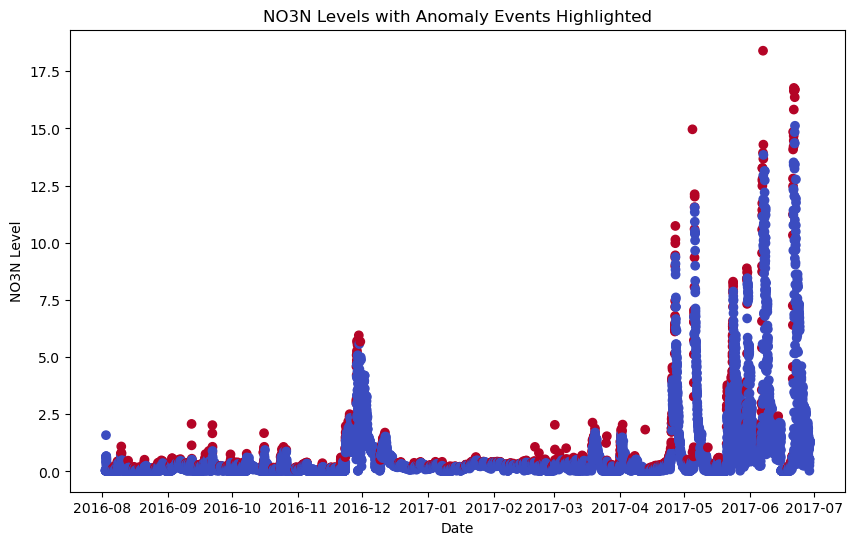

In [81]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['NO3N'], c=anomaly_labels, cmap='coolwarm')
plt.title('NO3N Levels with Anomaly Events Highlighted')
plt.xlabel('Date')
plt.ylabel('NO3N Level')
plt.show()